In [3]:
import os
print(os.listdir('../input/worms4/worms'))

['cabbage_worm', 'cutworm', 'corn_earworm', 'fall_armyworm']


In [4]:
dataPath = '../input/worms4/worms'

In [5]:
# Import Libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import numpy as np
import cv2
import glob
import random

from IPython.display import Image
import matplotlib.pyplot as plt

In [7]:
def prepare_image(filepath):
    img = cv2.imread(filepath)
    img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img_result  = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    return img_result

In [8]:
dirList = glob.glob(dataPath+'/*') # list of all directories in dataPath
dirList.sort() # sorted in alphabetical order
print(dirList)

['../input/worms4/worms/cabbage_worm', '../input/worms4/worms/corn_earworm', '../input/worms4/worms/cutworm', '../input/worms4/worms/fall_armyworm']


In [9]:
Y_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [Y_data.append(i) for file in fileList]
print(Y_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [10]:
X_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [X_data.append(prepare_image(file)) for file in fileList]
X_data = np.asarray(X_data)
print(X_data.shape)

(494, 224, 224, 3)


In [11]:
## random shuffle
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state=0)

In [12]:
print(Y_data)

[2, 1, 2, 2, 0, 0, 1, 2, 3, 3, 2, 1, 2, 2, 1, 2, 2, 3, 2, 0, 1, 3, 3, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 0, 1, 1, 0, 0, 1, 1, 3, 3, 1, 3, 3, 2, 3, 0, 2, 1, 3, 2, 3, 2, 3, 3, 3, 3, 0, 3, 2, 1, 0, 3, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 2, 3, 3, 1, 3, 3, 0, 2, 0, 1, 3, 2, 0, 2, 0, 3, 2, 1, 2, 1, 1, 0, 2, 0, 3, 3, 2, 3, 1, 3, 2, 0, 2, 2, 1, 2, 0, 1, 3, 3, 3, 3, 1, 0, 3, 1, 2, 2, 2, 3, 2, 0, 0, 0, 1, 0, 3, 1, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 0, 2, 2, 1, 3, 3, 1, 3, 3, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 3, 3, 3, 3, 1, 2, 2, 1, 2, 3, 2, 2, 1, 0, 1, 1, 1, 3, 2, 2, 3, 2, 0, 2, 3, 1, 1, 3, 0, 3, 0, 1, 2, 3, 0, 1, 2, 1, 2, 2, 1, 3, 1, 1, 3, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 3, 2, 0, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 3, 0, 2, 2, 0, 2, 3, 0, 2, 3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 0, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 3, 0, 2, 2, 2, 3, 0, 2, 1, 

343


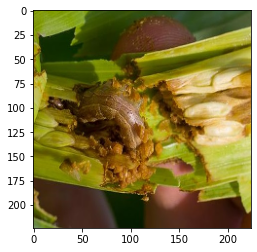

In [13]:
testNum = random.randint(0,len(X_data)-1)
print(testNum)
plt.imshow(X_data[testNum])

In [14]:
num_classes = len(dirList) 
labels = [dir.replace(dataPath+"/", "") for dir in dirList]
print(labels)

['cabbage_worm', 'corn_earworm', 'cutworm', 'fall_armyworm']


In [15]:
equilibre = []
[equilibre.append(Y_data.count(i)) for i in range(len(dirList))]
print(equilibre)

[86, 125, 149, 134]


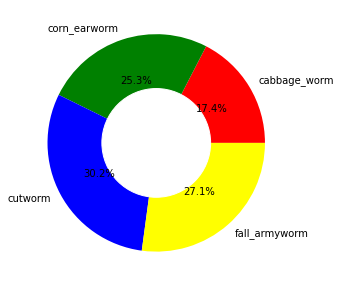

In [16]:
# plot the circle of value counts in dataset
plt.figure(figsize=(5,5))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(equilibre, labels=labels, colors=['red','green','blue','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
# Data Normalisation
X_train = X_data / 255.0
print(X_train.shape)

(494, 224, 224, 3)


In [18]:
# One-hot encoding
Y_train = to_categorical(Y_data)
print(Y_train.shape)

(494, 4)


In [19]:
input_shape = (224, 224, 3)

In [20]:
# use MobieNet V2 as base model
net=MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False) 

# add Fully-Connected Layers to Model
x=net.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) # FC layer 1
x=Dense(64,activation='relu')(x)   # FC layer 2
out=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=net.input,outputs=out)

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________________

In [21]:
# show layers no. & name
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [22]:
# set extra layers to trainable 
for layer in model.layers[:155]:
    layer.trainable=False
for layer in model.layers[155:]:
    layer.trainable=True

In [23]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [24]:
# Compile Model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train Model (target is loss <0.01)
batch_size= 16
num_epochs = 20
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=num_epochs) #,validation_data=(X_valid,Y_valid))

Epoch 1/20
31/31 [==============================] - 8s 273ms/step - loss: 1.0637 - accuracy: 0.5850
Epoch 2/20
31/31 [==============================] - 8s 269ms/step - loss: 0.4005 - accuracy: 0.8623
Epoch 3/20
31/31 [==============================] - 8s 265ms/step - loss: 0.2190 - accuracy: 0.9332
Epoch 4/20
31/31 [==============================] - 9s 274ms/step - loss: 0.1098 - accuracy: 0.9757
Epoch 5/20
31/31 [==============================] - 8s 269ms/step - loss: 0.0510 - accuracy: 0.9939
Epoch 6/20
31/31 [==============================] - 9s 279ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 7/20
31/31 [==============================] - 9s 275ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 8/20
31/31 [==============================] - 8s 270ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 9/20
31/31 [==============================] - 8s 269ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 10/20
31/31 [==============================] - 8s 271ms/step - loss: 0.0044 - accuracy: 1.0000

In [26]:
# Save Model
model.save('tl_worms4.h5')

In [27]:
def classify_worms(imageFile):
    testData = prepare_image(imageFile).reshape(1,224,224,3)
    testData = testData / 255.0
    predictions = model.predict(testData)
    maxindex = int(np.argmax(predictions))
    print(predictions[0][maxindex],labels[maxindex])
    return labels[maxindex]

0.99996126 cabbage_worm


'cabbage_worm'

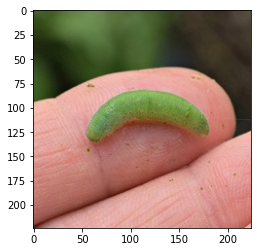

In [28]:
imageFile=dirList[0]+'/122.Cabbage-Worm.jpg'
plt.imshow(prepare_image(imageFile))
classify_worms(imageFile)

0.9985623 corn_earworm


'corn_earworm'

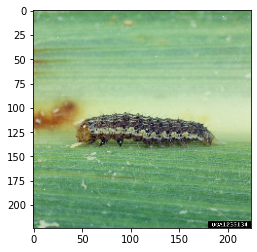

In [29]:
imageFile=dirList[1]+'/129.1235134.jpg'
plt.imshow(prepare_image(imageFile))
classify_worms(imageFile)

0.9991418 cutworm


'cutworm'

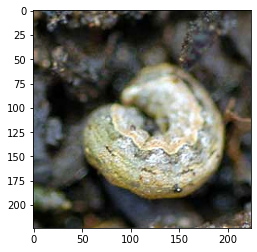

In [30]:
imageFile=dirList[2]+'/1.cutworm-caterpillar.jpg'
plt.imshow(prepare_image(imageFile))
classify_worms(imageFile)

0.999647 fall_armyworm


'fall_armyworm'

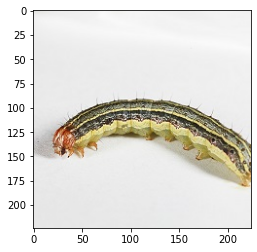

In [31]:
imageFile=dirList[3]+'/12.fall-armyworm.jpg'
plt.imshow(prepare_image(imageFile))
classify_worms(imageFile)

In [32]:
Y_pred = model.predict(X_train)
y_pred = np.argmax(Y_pred,axis=1)
#y_label= [labels[k] for k in y_pred]
cm = confusion_matrix(Y_data, y_pred)
print(cm)

[[ 86   0   0   0]
 [  0 125   0   0]
 [  0   0 149   0]
 [  0   0   0 134]]


In [33]:
print(classification_report(Y_data, y_pred, target_names=labels))

               precision    recall  f1-score   support

 cabbage_worm       1.00      1.00      1.00        86
 corn_earworm       1.00      1.00      1.00       125
      cutworm       1.00      1.00      1.00       149
fall_armyworm       1.00      1.00      1.00       134

     accuracy                           1.00       494
    macro avg       1.00      1.00      1.00       494
 weighted avg       1.00      1.00      1.00       494



In [34]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
specificity = TN / float( TN + FP)
sensitivity = TP / float(FN + TP)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)

Specificity: 1.0
Sensitivity: 1.0


In [35]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

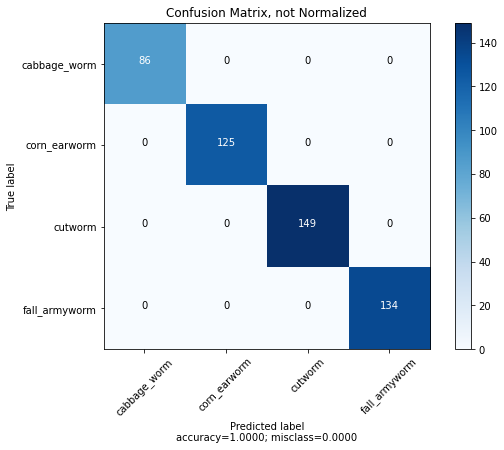

In [36]:
plot_confusion_matrix(cm, 
                      normalize=False,
                      target_names = labels,
                      title="Confusion Matrix, not Normalized")